In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -U pm4py
!apt install -y graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


Reading CSV file

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/process mining project for USC students/heart_log_val_0.csv')

In [5]:
df.head()

,type,concept:name,value,time:timestamp,case:concept:name,case:gender,case:age,case:charlson,case:elixhauser,case:dob,case:dod,case:ethnicity,case:label,admission_id,PREDICT
0,lab,Sodium_mean_2,2.0,2166-07-23 17:03:00+00:00,283,M,76,1,36,2090-09-05 05:30:00+00:00,09-12-2166 00:00,WHITE,False,NaN,NaN
1,lab,Sodium_std_0,0.0,2166-07-26 10:30:00+00:00,283,M,76,1,36,2090-09-05 05:30:00+00:00,09-12-2166 00:00,WHITE,False,NaN,NaN
2,admission,unplanned,NaN,2166-08-13 03:32:00+00:00,283,M,76,1,36,2090-09-05 05:30:00+00:00,09-12-2166 00:00,WHITE,False,109185.0,NaN
3,admission,Medicare,NaN,2166-08-13 03:32:00+00:00,283,M,76,1,36,2090-09-05 05:30:00+00:00,09-12-2166 00:00,WHITE,False,109185.0,NaN
4,lab,Sodium_mean_2,2.0,2166-08-13 03:32:10+00:00,283,M,76,1,36,2090-09-05 05:30:00+00:00,09-12-2166 00:00,WHITE,False,NaN,NaN


In [6]:
event_type = df['type'].unique()
print(event_type)

['lab' 'admission' 'artificial' 'elix_comorb']


In [7]:
event = df['concept:name'].unique()

In [8]:
for i in event:
    print(i)

Sodium_mean_2
Sodium_std_0
unplanned
Medicare
Urea Nitrogen_mean_2
Sodium_std_2
Urea Nitrogen_std_2
event_0
event_2
event_3
event_6
event_9
event_11
event_14
event_15
event_16
event_19
event_20
event_26
event_29
CHF
OND
COAG
FED
Urea Nitrogen_mean_1
Urea Nitrogen_std_1
Private
Sodium_mean_3
Urea Nitrogen_mean_3
CARIT
VALV
PARA
Urea Nitrogen_std_4
Medicaid
PCD
HYPUNC
CPD
HYPOTHY
Sodium_std_1
NTproBNP_mean_9
NTproBNP_std_1
Sodium_std_3
Urea Nitrogen_std_3
Sodium_mean_1
DIABUNC
LD
WLOSS
ALCOHOL
PVD
NTproBNP_std_0
HYPC
RF
DEPRE
planned
Creatinine, Serum_mean_0
Creatinine, Serum_std_0
DRUG
BLANE
SOLIDTUM
NTproBNP_std_6
OBES
DIABC
Urea Nitrogen_mean_0
PUD
METACANC
DANE
Sodium_mean_4
Sodium_std_4
LYMPH
Urea Nitrogen_mean_4
Urea Nitrogen_std_0
PSYCHO
RHEUMD


 Converting csv file to xes file

In [9]:
from pm4py.objects.log.exporter.xes import exporter as xes_exporter

In [10]:
xes_exporter.apply(df, '/content/drive/My Drive/Colab Notebooks/process mining project for USC students/test.xes')

exporting log, completed traces ::   0%|          | 0/78 [00:00<?, ?it/s]

Inductive miner

In [11]:
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

In [12]:
log = xes_importer.apply('/content/drive/My Drive/Colab Notebooks/process mining project for USC students/test.xes')
thrd = 0.6
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log, noise_threshold = thrd)
### Report Petri-net properties ###
print(float(thrd))
print("PN Places:", len(net.places))
print("PN Transitions:", len(net.transitions))

/usr/local/lib/python3.10/dist-packages/pm4py/util/dt_parsing/parser.py:76: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/78 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pm4py/utils.py:494: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


0.6
PN Places: 36
PN Transitions: 52


Exporting PNML

In [13]:
pm4py.write_pnml(net, initial_marking, final_marking, '/content/drive/My Drive/Colab Notebooks/process mining project for USC students/test.pnml')

In [14]:
net, im, fm = pm4py.read_pnml("/content/drive/My Drive/Colab Notebooks/process mining project for USC students/test.pnml")

In [15]:
print("PN Places:", len(net.places))
print("\nPN Places:", list(net.places))
print("\nPN Transitions:", len(net.transitions))
print("\nPN Transitions:", list(net.transitions))

PN Places: 36

PN Places: [p_17, source, p_22, p_11, p_5, p_33, p_35, p_13, p_39, p_25, p_6, p_21, p_9, p_32, p_12, p_15, p_7, sink, p_18, p_19, p_20, p_24, p_38, p_29, p_34, p_36, p_16, p_4, p_8, p_10, p_23, p_30, p_14, p_26, p_27, p_37]

PN Transitions: 52

PN Transitions: [(118de6c4-0140-4f37-b3df-529f70f3105e, 'event_6'), (skip_18, None), (2949f2a4-bb83-4dc4-9692-ab4c2843fe73, 'Urea Nitrogen_mean_2'), (skip_5, None), (a1e006d8-3e11-4854-9969-8bb4704c49ef, 'Sodium_mean_3'), (6a30ac7e-91a6-401e-9927-280dead9ad56, 'event_20'), (492e22ab-db98-4986-8250-9e96a648b4b1, 'Sodium_std_3'), (skip_13, None), (skip_3, None), (76d65b13-ea06-4b74-953a-b0e4a18ccd9f, 'Sodium_std_2'), (skip_10, None), (f0b2f010-1990-4767-8050-1383f4b5e31e, 'Private'), (356946bf-48d1-496c-a201-8cef4d308134, 'event_14'), (89a2ae59-77e3-4d00-a18c-17b2d1baab39, 'event_3'), (aebd5437-4ec1-4078-a8a0-f79a18cf0ec9, 'event_19'), (7ed4276d-f721-4715-b9b7-32c2ba0f6757, 'Medicare'), (80608c9a-8030-4f39-972e-e0da6f4e711c, 'planne

Petri Net

In [16]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer
import graphviz
import tempfile


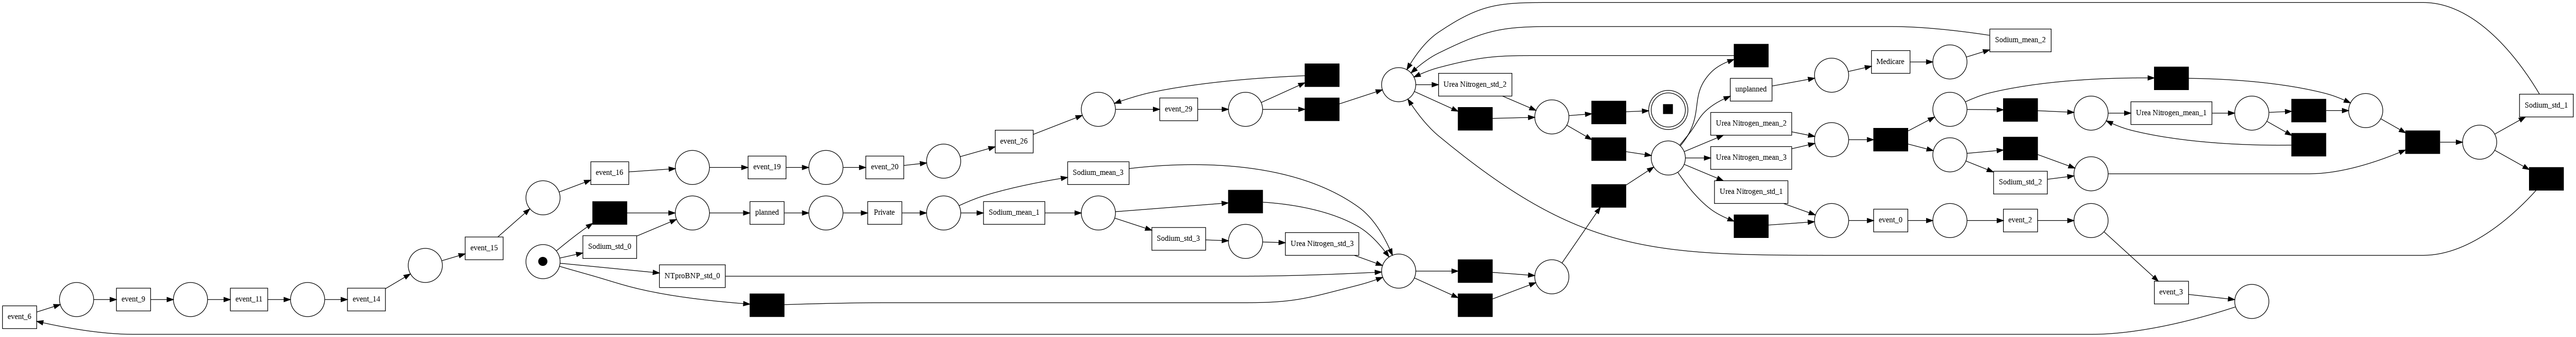

In [17]:
gviz = pn_visualizer.apply(net, im, fm)
import IPython.display as display
#display(gviz)
with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as tmpfile:
    image_path = tmpfile.name
    pn_visualizer.save(gviz, image_path)

#Display the saved image in the Colab notebook
display.Image(filename=image_path)

In [18]:
#conformance checking

Conformance checking

Precision

In [19]:
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
prec = precision_evaluator.apply(log, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)

replaying log with TBR, completed variants ::   0%|          | 0/4545 [00:00<?, ?it/s]

In [20]:
print(prec)

0.3456536618754278


Fitness

In [21]:
# Token based
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
fitness_token = replay_fitness_evaluator.apply(log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)

# Alignment based
#fitness_alignment = replay_fitness_evaluator.apply(log, net, im, fm, variant=replay_fitness_evaluator.Variants.ALIGNMENT_BASED)

replaying log with TBR, completed variants ::   0%|          | 0/78 [00:00<?, ?it/s]

In [22]:
print(fitness_token)
#print(fitness_alignment)

{'perc_fit_traces': 2.5641025641025643, 'average_trace_fitness': 0.9104519056169312, 'log_fitness': 0.9175150754746344, 'percentage_of_fitting_traces': 2.5641025641025643}
